In [1]:
using BoundaryValueDiffEq, ModelingToolkit, Plots
using ModelingToolkit: t_nounits as t, D_nounits as D

In [ ]:
@constants begin
    S = 10
    k = 0.5
end
@parameters begin
    γ
end
@variables begin
    F(..)
    ψ(..)
    φ(..)
    #γ(..)
    #x(..)
end
eqns = [
    F(t) ~ tanh(t)
    S * γ * (ψ(t) - F(t) * φ(t)) ~ (D(D(ψ(t))) - k^2 * ψ(t))
    γ^2 * (D(D(φ(t))) - k^2 * φ(t)) ~ -F(t) * D(D(ψ(t))) + F(t) * k^2 * ψ(t) + D(D(F(t))) * ψ(t)
    #D(γ(t)) ~ 0.0
    #D(x(t)) ~ abs2(ψ(t))
]

global L = 15.0

constr = [ψ(L) ~ 0.0, φ(L) ~ 0.0];

In [3]:
@mtkcompile bvp = System(
    eqns, t;
    constraints=constr
)

Model bvp:
Equations (4):
  4 standard: see equations(bvp)
Unknowns (4): see unknowns(bvp)
  φ(t)
  ψ(t)
  ψˍt(t)
  φˍt(t)
Parameters (3): see parameters(bvp)
  γ
  k [defaults to 0.5]
  S [defaults to 10]
Observed (3): see observed(bvp)

In [ ]:
# pass uncertain parameters/initial conditions to solver via `guesses` so it knows it can change them
prob = BVProblem(
    bvp,
    [ψ(t) => ψouter(-L), φ(t) => ϕouter(-L)],
    (-L, L),
    guesses=[D(ψ(t)) => 1e-5, D(φ(t)) => 1e-5, γ => 0.1],
    jac=true,
    tstops=[0.0]
    #sparse=true
)

BVProblem with uType Vector{Float64} and tType Float64. In-place: true
Non-trivial mass matrix: false
timespan: (-15.0, 15.0)
u0: 4-element Vector{Float64}:
 -0.0016592531104436042
  0.001659253110443294
  1.0e-5
  1.0e-5

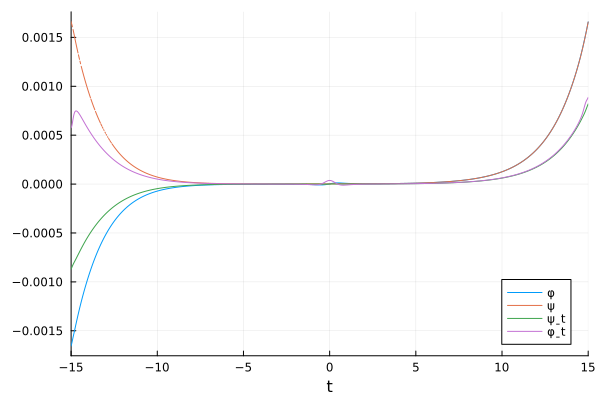

In [6]:
sol = solve(prob, MIRK4(), dt=0.1)
plot(sol)

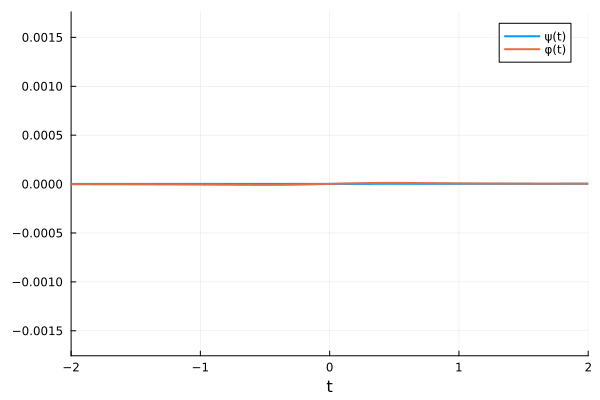

In [ ]:
plot(sol, idxs=(0, 2), label="ψ(t)", lw=2)
plot!(sol, idxs=(0, 1), label="φ(t)", xlabel="t", legend=:best, lw=2)

In [10]:
sol.prob.p[1]

1-element Vector{Float64}:
 0.1